# This is the FIFA 22 player analysis Jupyter Notebook. 
#### Here we will use the official FIFA player statistics from 
#### the EA's database to examine how specific players' characteristics 
#### impact their rating and which statistics are an accurate measure in predicting their overall rating.

This notebook will cover basics of the exploratory analysis and showcase what statistical techniques can be used 
in order to find significant variables in predicting the overall player rating.

The exploratory analysis will cover:
    - general overview of the dataset,
    - data cleaning (if applicable),
    - exploration of trends, correlations and general characteristics.
This will be done to answer a number of questions such as:
    - Which statistics can 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from decimal import Decimal, getcontext
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [21]:
getcontext().prec=64

In [22]:
raw_data = pd.read_csv("FIFA22_official_data.csv")

In [23]:
raw_data

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0
16708,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,47.0,€259K,7.0


#### Here we instantly find a few irrelevant vectors (columns) such as links to player's photo, links to flag's photo, links to club's logo.
#### Moreover, there are some columns which we won't find useful as they are either non-descriptive enough (look column "Special").

In [24]:
data = raw_data.drop(["Photo", "Flag", "Club Logo", "Special", "International Reputation", "Body Type", "Real Face", "Joined", "Loaned From",
                      "Contract Valid Until", "Release Clause", "Position", "Best Overall Rating", "Potential"], axis=1, inplace=False)

#### After having cleaned the data we end up with player statistics which describe their on-field performance as well as their value and wage.

In [25]:
data

,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Weak Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,DefensiveAwareness
0,212198,Bruno Fernandes,26,Portugal,88,Manchester United,€107.5M,€250K,Right,3.0,...,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,72.0
1,209658,L. Goretzka,26,Germany,87,FC Bayern München,€93M,€140K,Right,4.0,...,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,74.0
2,176580,L. Suárez,34,Uruguay,88,Atlético de Madrid,€44.5M,€135K,Right,4.0,...,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,42.0
3,192985,K. De Bruyne,30,Belgium,91,Manchester City,€125.5M,€350K,Right,5.0,...,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CM,68.0
4,224334,M. Acuña,29,Argentina,84,Sevilla FC,€37M,€45K,Left,3.0,...,NaN,84.0,82.0,8.0,14.0,13.0,13.0,14.0,LB,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,England,53,Cheltenham Town,€100K,€1K,Right,2.0,...,5.0,11.0,12.0,55.0,54.0,52.0,50.0,59.0,GK,NaN
16706,262846,�. Dobre,20,Romania,53,FC Academica Clinceni,€180K,€550,Right,2.0,...,NaN,13.0,12.0,57.0,52.0,53.0,48.0,58.0,GK,5.0
16707,241317,21 Xue Qinghao,19,China PR,47,Shanghai Shenhua FC,€100K,€700,Right,2.0,...,NaN,11.0,9.0,49.0,48.0,45.0,38.0,52.0,GK,21.0
16708,259646,A. Shaikh,18,India,47,ATK Mohun Bagan FC,€110K,€500,Right,3.0,...,NaN,14.0,13.0,49.0,41.0,39.0,45.0,49.0,GK,7.0


With the data being relatively clean, we can begin basic data exploration.
First we will check the age distribution across players.

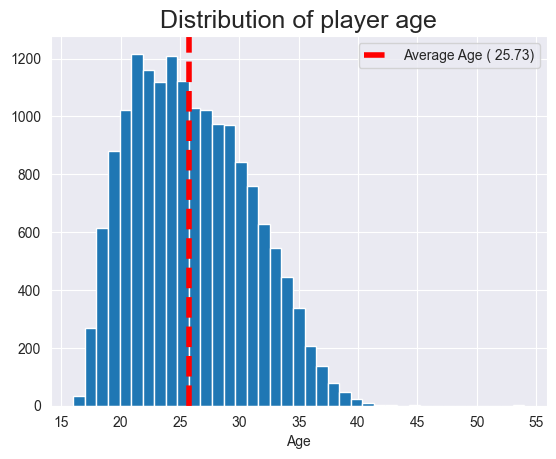

In [26]:
plt.hist(data["Age"], bins=39)
average_age = data["Age"].mean()
plt.axvline(x=average_age, color="red", linestyle="--", linewidth=4, label=f"Average Age ({average_age: .2f})")
plt.xlabel("Age")
plt.legend()
plt.title("Distribution of player age", fontsize=18)
plt.show();

Here we find a number of players older than 40 years old, let us see who are the oldest players playing football professionally last year

In [27]:
oldest_ten_players = data.sort_values(by="Age", ascending=False).head(10)
print("The 10 oldest players are:")
for index, row in oldest_ten_players.iterrows():
    print(f"{row['Name']} - {row['Age']}")

The 10 oldest players are:
K. Miura - 54
19 O. Pérez - 45
S. Nakamura - 43
C. Lucchetti - 43
G. Buffon - 43
08 M. Ballotta - 43
21 Hilton - 42
16 C. Blanco - 42
K. Ellison - 42
21 Lee Dong Gook - 41


Here we find that some players have some noise in their names in a way of seemingly random numbers, let us investigate.

In [28]:
oldest_ten_players

,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Weak Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,DefensiveAwareness
14735,254704,K. Miura,54,Japan,59,Yokohama FC,€0,€700,Right,4.0,...,NaN,13.0,13.0,6.0,14.0,8.0,6.0,7.0,CF,16.0
15242,140029,19 O. Pérez,45,Mexico,71,Pachuca,€160K,€8K,Right,3.0,...,23.0,12.0,11.0,70.0,64.0,65.0,73.0,74.0,GK,NaN
10050,29552,S. Nakamura,43,Japan,63,Yokohama FC,€0,€800,Left,3.0,...,NaN,38.0,34.0,8.0,6.0,7.0,15.0,6.0,CAM,40.0
14932,156483,C. Lucchetti,43,Argentina,72,Atlético Tucumán,€250K,€4K,Right,3.0,...,NaN,22.0,13.0,73.0,70.0,77.0,69.0,70.0,GK,21.0
15182,1179,G. Buffon,43,Italy,80,Parma,€2.3M,€18K,Right,2.0,...,NaN,11.0,11.0,76.0,73.0,70.0,90.0,76.0,GK,13.0
16155,4703,08 M. Ballotta,43,Italy,65,Lazio,€0,€0,Right,3.0,...,28.0,34.0,NaN,65.0,69.0,77.0,73.0,68.0,GK,NaN
4913,153260,21 Hilton,42,Brazil,75,Montpellier Hérault SC,€0,€18K,Right,4.0,...,NaN,78.0,74.0,12.0,7.0,11.0,12.0,13.0,CB,78.0
6717,135708,16 C. Blanco,42,Mexico,71,Club América,€0,€20K,Right,5.0,...,18.0,32.0,38.0,6.0,12.0,12.0,16.0,9.0,CAM,NaN
9090,2702,K. Ellison,42,England,58,Newport County,€0,€2K,Left,3.0,...,NaN,36.0,34.0,7.0,11.0,6.0,14.0,6.0,ST,41.0
9263,136553,21 Lee Dong Gook,41,Korea Republic,69,Jeonbuk Hyundai Motors,€0,€5K,Right,4.0,...,NaN,15.0,16.0,11.0,6.0,12.0,10.0,9.0,ST,30.0


The numbers seem to be a part of special characters impossible to render by pandas, for simplicity we will remove those numbers.

In [29]:
data["Name"] = data["Name"].str.replace(r'\d+', '', regex=True)
data["Name"] = data["Name"].str.lstrip()

oldest_ten_players = data.sort_values(by="Age", ascending=False).head(10)
print("The 10 oldest players are:")
for index, row in oldest_ten_players.iterrows():
    print(f"{row['Name']} - {row['Age']}")

The 10 oldest players are:
K. Miura - 54
O. Pérez - 45
S. Nakamura - 43
C. Lucchetti - 43
G. Buffon - 43
M. Ballotta - 43
Hilton - 42
C. Blanco - 42
K. Ellison - 42
Lee Dong Gook - 41


Here we find that across all major and minor leagues present in FIFA22, there is only one player older than 50 years old.
This player being K. Miura from Japan playing for Yokohama FC.

Now, we can start inspecting the performance of players. First let's start by exploring the overall rating distribution across ages.
First intuition suggests that we should expect a shape resembling a somewhat flat bell curve with players starting lower at a young age,
hitting their prime in the middle of their carriers and slowly decline as they age.

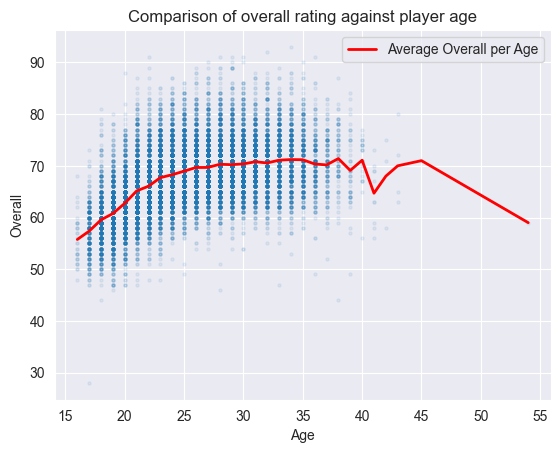

In [54]:
age_rating_avg = data.groupby("Age")["Overall"].mean().reset_index()
plt.scatter(data["Age"], data["Overall"], s=5, alpha=0.08)
plt.plot(age_rating_avg['Age'], age_rating_avg['Overall'], color='red', linewidth=2, label='Average Overall per Age')
plt.xlabel("Age")
plt.ylabel("Overall")
plt.title("Comparison of overall rating against player age")
plt.legend()
plt.show();

Looking at the result there is some minor resemblance, although not as pronounced as expected.

Now let us look at a correlation between some specific statistics.
First we will compare the finishing statistic (1-100 score) and how proficient the player is with his weak foot (1-5 stars).

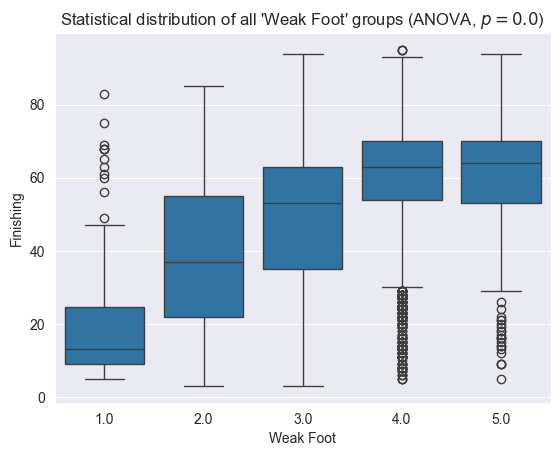

In [52]:
sns.boxplot(x="Weak Foot", y="Finishing", data=data)
plt.xlabel("Weak Foot")
plt.ylabel("Finishing")

groups = data["Weak Foot"].unique()
grouped_data = [data[data["Weak Foot"] == group]["Finishing"] for group in groups]
F, p = stats.kruskal(*grouped_data)

plt.title(f"Statistical distribution of all 'Weak Foot' groups (ANOVA, $p = {p}$)")
plt.show();

In [32]:
pairwise_comparison = pairwise_tukeyhsd(data["Finishing"], data["Weak Foot"])
print(pairwise_comparison)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   1.0    2.0  17.3909   0.0 12.3609 22.4208   True
   1.0    3.0  27.9863   0.0 23.0084 32.9642   True
   1.0    4.0  39.1645   0.0 34.1268 44.2023   True
   1.0    5.0  38.8348   0.0 33.1619 44.5076   True
   2.0    3.0  10.5954   0.0  9.5966 11.5942   True
   2.0    4.0  21.7736   0.0 20.5098 23.0375   True
   2.0    5.0  21.4439   0.0 18.5457  24.342   True
   3.0    4.0  11.1782   0.0 10.1407 12.2157   True
   3.0    5.0  10.8485   0.0  8.0416 13.6553   True
   4.0    5.0  -0.3298 0.998 -3.2415   2.582  False
---------------------------------------------------


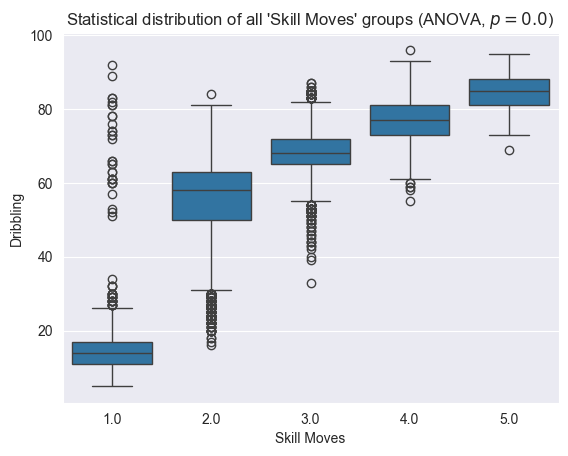

In [53]:
sns.boxplot(x="Skill Moves", y="Dribbling", data=data)
plt.xlabel("Skill Moves")
plt.ylabel("Dribbling")

groups = data["Skill Moves"].unique()
grouped_data = [data[data["Skill Moves"] == group]["Dribbling"] for group in groups]
F, p = stats.kruskal(*grouped_data)

plt.title(f"Statistical distribution of all 'Skill Moves' groups (ANOVA, $p = {p}$)")
plt.show();

In [34]:
pairwise_comparison = pairwise_tukeyhsd(data["Dribbling"], data["Skill Moves"])
print(pairwise_comparison)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   1.0    2.0  40.2361   0.0 39.5986 40.8736   True
   1.0    3.0  53.3428   0.0 52.7007 53.9849   True
   1.0    4.0  61.4347   0.0  60.589 62.2805   True
   1.0    5.0   68.918   0.0 66.0164 71.8195   True
   2.0    3.0  13.1067   0.0 12.7146 13.4989   True
   2.0    4.0  21.1986   0.0 20.5227 21.8745   True
   2.0    5.0  28.6819   0.0 25.8252 31.5385   True
   3.0    4.0   8.0919   0.0  7.4117  8.7721   True
   3.0    5.0  15.5751   0.0 12.7174 18.4328   True
   4.0    5.0   7.4832   0.0   4.573 10.3935   True
---------------------------------------------------


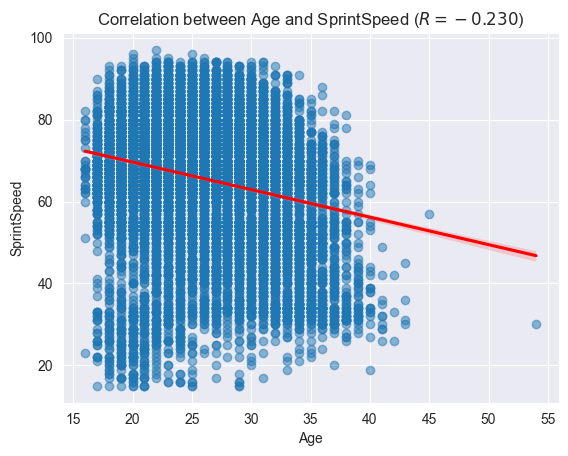

In [35]:
sns.regplot(x="Age", y="SprintSpeed", data=data, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
test = stats.pearsonr(data["SprintSpeed"], data["Age"])
plt.title(f"Correlation between Age and SprintSpeed ($R = {test.statistic:.3f}$)")
plt.show();

As expected, player's age and player's speed are negatively correlated.
We can observe that the upper bound of the pace slowly decreases as age decreases.

As a reminder, the R value is a statistical measure that quantifies the level of correlation of two continuous variables with 1 meaning a perfect positive
correlation, -1 meaning a perfect negative correlation and 0 meaning no correlation. 
The formula for this calculation is: $$R= \frac{n(\sum xy)-(\sum x)(\sum y)}{\sqrt{[n\sum x^2-(\sum x)^2][n\sum y^2-(\sum y)^2]}$$

Now, as pace is divided into SprintSpeed and Acceleration, we will also compare the acceleration to age. 

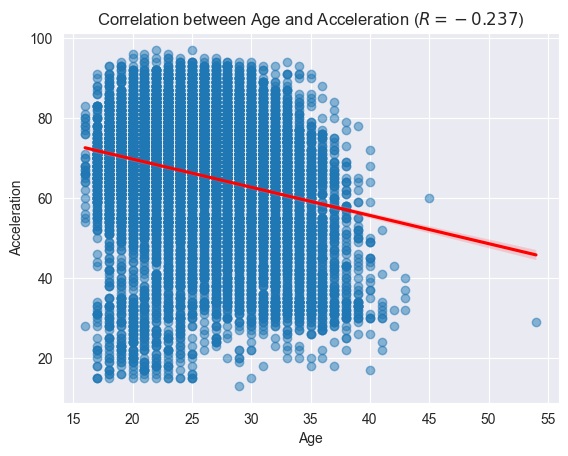

In [36]:
sns.regplot(x="Age", y="Acceleration", data=data, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
test = stats.pearsonr(data["Age"], data["Acceleration"])
plt.title(f"Correlation between Age and Acceleration ($R = {test.statistic:.3f}$)")
plt.show();

Here the result is very similar to what we have observed in SprintSpeed-Age comparison.

For completeness, let us compare Acceleration with SprintSpeed to see how strongly they are related.

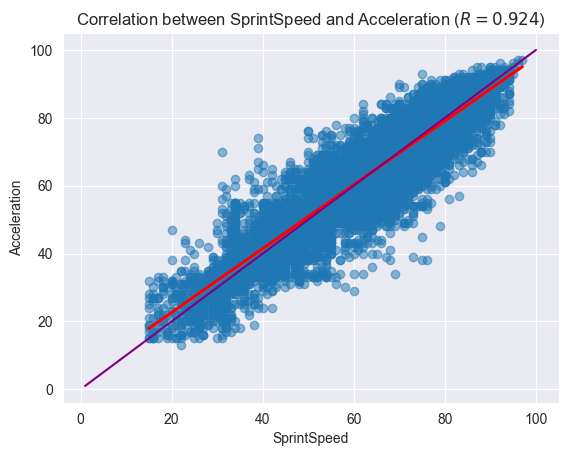

In [37]:
sns.regplot(x="SprintSpeed", y="Acceleration", data=data, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.plot(np.linspace(1, 100, 100), np.linspace(1, 100, 100), color="purple")

test = stats.pearsonr(data["SprintSpeed"], data["Acceleration"])
plt.title(f"Correlation between SprintSpeed and Acceleration ($R = {test.statistic:.3f}$)")
plt.show();

Here we observe that the SprintSpeed and Acceleration are strongly positively correlated, as visible by the red line. Moreover, the pink line
shows is the x=y line, meaning it is the space where SprintSpeed and Acceleration are the same. If the points were to be on this line,
then we would conclude that these two statistics are perfectly correlated. They do not lay on the line exclusively, but we can observe
that the shape of the area covered by the points follows the line and the area covered by points is denser closer to the line.

In [59]:
stats_no_label = data.drop(["ID", "Name", "Nationality", "Overall", "Club", "Value", "Wage", "Preferred Foot", "Weak Foot", "Skill Moves",
                            "Work Rate", "Jersey Number", "Height", "Weight", "Best Position", "Age", "Marking"], axis=1, inplace=False)
stats_no_label

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness
0,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,...,91.0,87.0,73.0,65.0,12.0,14.0,15.0,8.0,14.0,72.0
1,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,...,60.0,82.0,85.0,77.0,13.0,8.0,15.0,11.0,9.0,74.0
2,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,...,83.0,87.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,42.0
3,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,...,83.0,89.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,68.0
4,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,...,76.0,87.0,84.0,82.0,8.0,14.0,13.0,13.0,14.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,12.0,5.0,13.0,18.0,7.0,12.0,11.0,13.0,19.0,10.0,...,18.0,37.0,11.0,12.0,55.0,54.0,52.0,50.0,59.0,NaN
16706,13.0,7.0,10.0,17.0,7.0,6.0,11.0,13.0,28.0,17.0,...,12.0,29.0,13.0,12.0,57.0,52.0,53.0,48.0,58.0,5.0
16707,12.0,9.0,14.0,15.0,6.0,8.0,12.0,13.0,14.0,12.0,...,15.0,17.0,11.0,9.0,49.0,48.0,45.0,38.0,52.0,21.0
16708,13.0,8.0,10.0,22.0,8.0,10.0,11.0,13.0,18.0,13.0,...,19.0,23.0,14.0,13.0,49.0,41.0,39.0,45.0,49.0,7.0


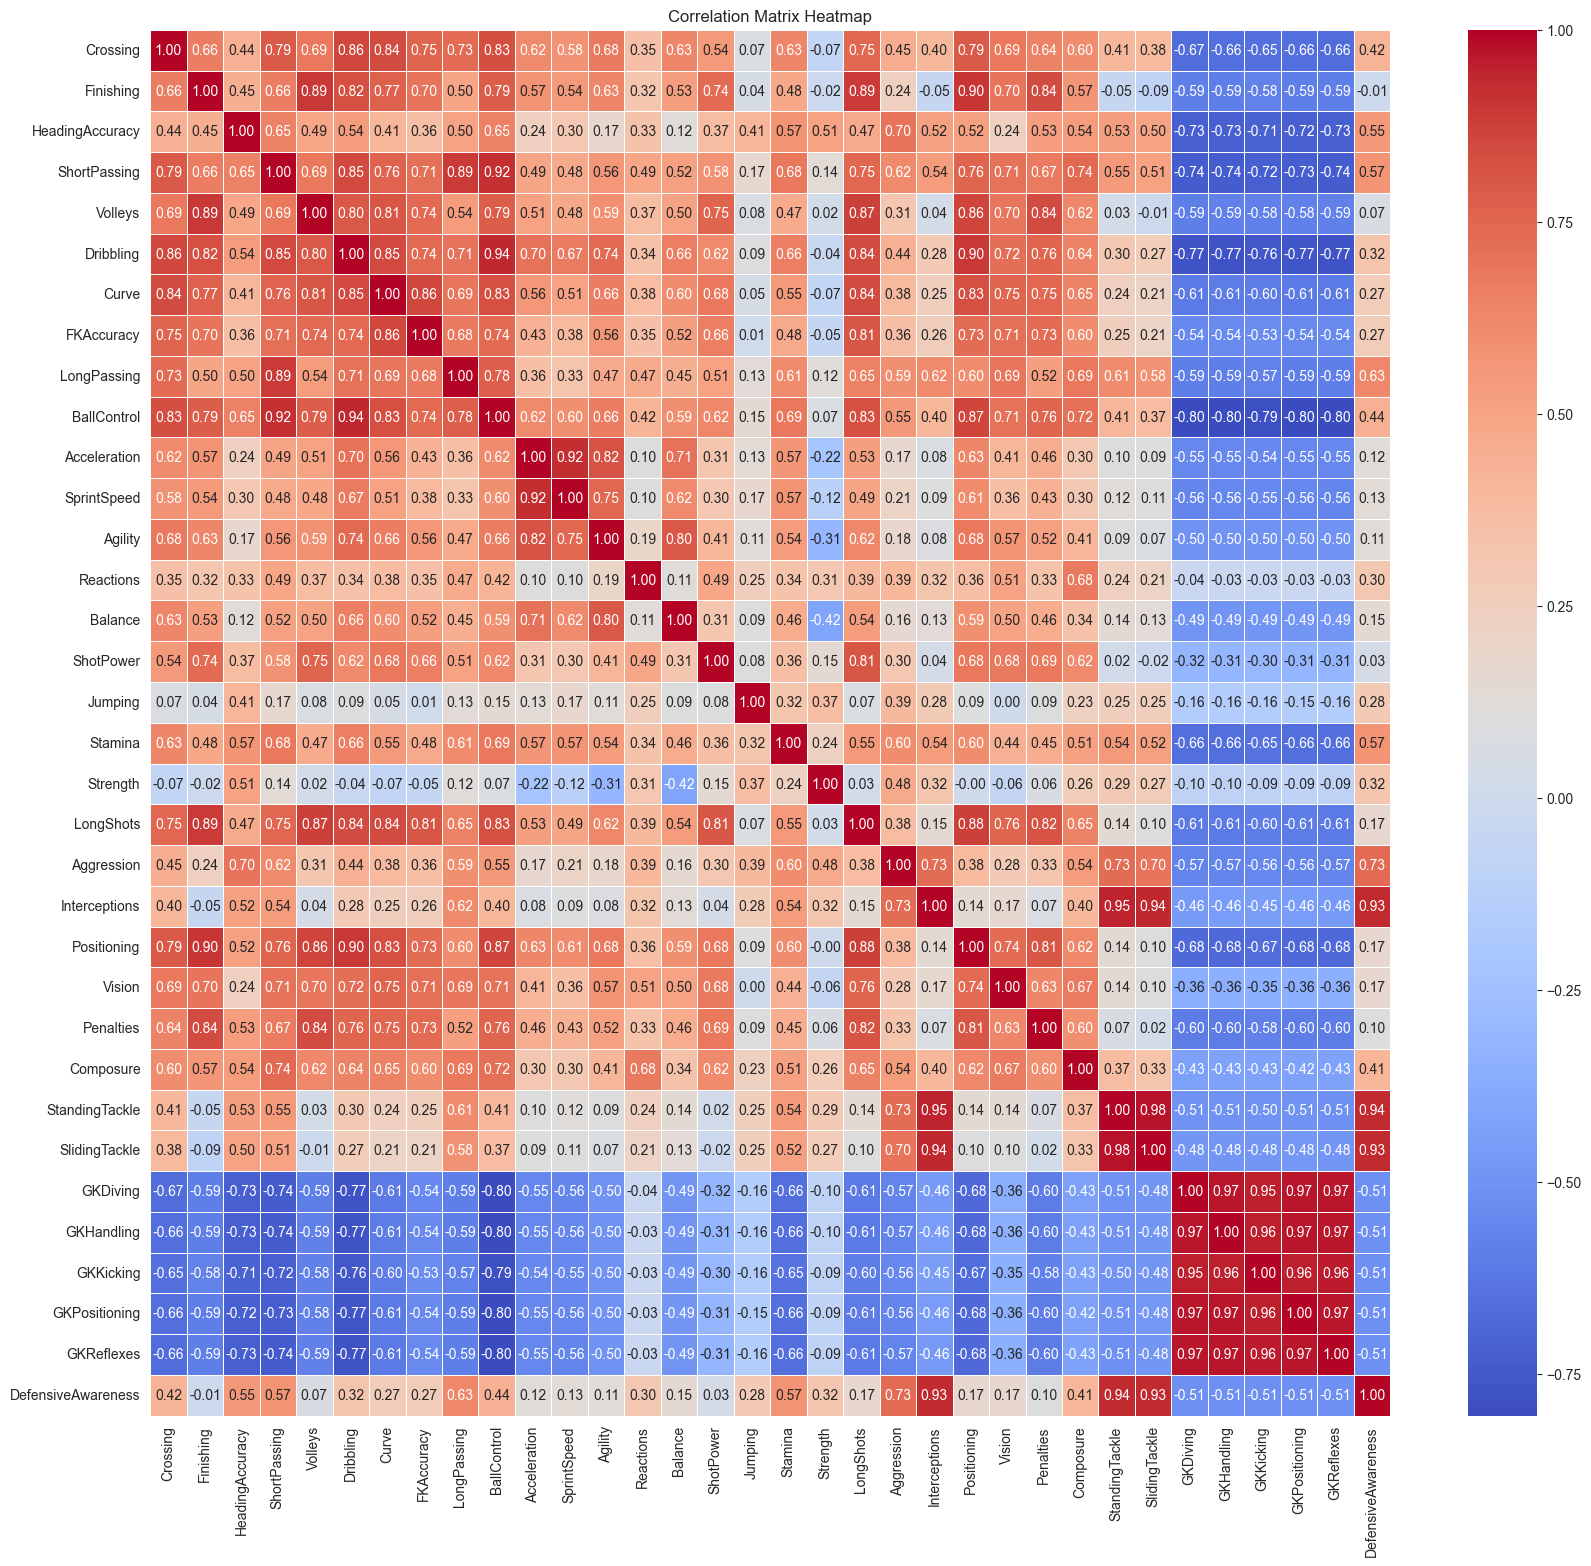

In [70]:
correlation_matrix = stats_no_label.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show();